In [ ]:
#ZIP FILE EXTRACT
import zipfile
import os

# Specify the zip file name and the folder to extract to
zip_file_name = '/content/caltech-101.zip'
extract_folder = '/content/'

# Create the folder if it doesn't exist
if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)

# Open the zip file in read mode
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    # Extract all files to the specified folder
    zip_ref.extractall(extract_folder)
import tarfile
import os

# Specify the tar.gz file name and the folder to extract to
tar_file_name = '/content/caltech-101/101_ObjectCategories.tar.gz'
extract_folder = '/content/'

# Create the folder if it doesn't exist
if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)

# Open the tar.gz file in read mode
with tarfile.open(tar_file_name, 'r:gz') as tar_ref:
    # Extract all files to the specified folder
    tar_ref.extractall(extract_folder)
import os
import random
import shutil

# Set the number of images to use for training
num_train = 30

# Set the paths to the input dataset and the output folders
input_dir = '/content/101_ObjectCategories'
train_dir = '/content/101_ObjectCategories/train'
test_dir = '/content/101_ObjectCategories/test'

# Create the output folders
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Loop over each class in the input dataset
for class_name in os.listdir(input_dir):
    class_dir = os.path.join(input_dir, class_name)
    if not os.path.isdir(class_dir):
        continue

    # Create the class subdirectories in the output folders
    train_class_dir = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)

    # Get a list of all image files in the class directory
    image_files = [os.path.join(class_dir, f) for f in os.listdir(class_dir) if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.png')]

    # Make sure there are enough images to use for training
    if len(image_files) < num_train:
        print(f'Skipping class {class_name}: not enough images ({len(image_files)})')
        continue

    # Randomly select num_train images for training, the rest for testing
    random.shuffle(image_files)
    train_files = image_files[:num_train]
    test_files = image_files[num_train:]

    # Copy the training images to the training folder
    for i in range(num_train):
        shutil.copy(train_files[i], train_class_dir)

    # Copy the testing images to the testing folder
    for i in range(num_train, len(image_files)):
        shutil.copy(test_files[i - num_train], test_class_dir)
training_path = "/content/101_ObjectCategories/train"
total_num_files = 0

print("Training images count:\n")

# Loop through each folder
for folder_name in os.listdir(training_path):
    # Ignore the .ipynb_checkpoints folder
    if folder_name.startswith("."):
        continue
        
    # Join the folder path with the folder name
    folder = os.path.join(training_path, folder_name)
    
    # Check if the folder is a directory
    if os.path.isdir(folder):
        # Count the number of files with extension .jpg or .jpeg
        num_files = len([file for file in os.listdir(folder) if file.endswith(('.jpg', '.jpeg'))])
        total_num_files += num_files
        
        # Print the folder name and the number of images in the folder
        print(f"{folder_name}: {num_files}")
        
print(f"\nTotal number of images: {total_num_files}")
testing_path = "/content/101_ObjectCategories/test"
total_num_files = 0

print("Testing images count:\n")

# Loop through each folder
for folder_name in os.listdir(testing_path):
    # Ignore the .ipynb_checkpoints folder
    if folder_name.startswith("."):
        continue
        
    # Join the folder path with the folder name
    folder = os.path.join(testing_path, folder_name)
    
    # Check if the folder is a directory
    if os.path.isdir(folder):
        # Count the number of files with extension .jpg or .jpeg
        num_files = len([file for file in os.listdir(folder) if file.endswith(('.jpg', '.jpeg'))])
        total_num_files += num_files
        
        # Print the folder name and the number of images in the folder
        print(f"{folder_name}: {num_files}")

In [22]:
model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_57 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 112, 112, 16)      4624      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 56, 56, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 56, 56, 16)        232

In [19]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time

# Define the data directories
train_dir = "/content/101_ObjectCategories/train"
test_dir = "/content/101_ObjectCategories/test"

# Define the image dimensions and batch size
img_width = 224
img_height = 224
batch_size = 32

# Define the number of classes in the dataset
num_classes = len(os.listdir(train_dir))

# Create an instance of the ImageDataGenerator class for data augmentation
start_time = time.time()
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
end_time = time.time()

# Load the training and validation datasets
train_dataset = train_datagen.flow_from_directory(train_dir,
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  class_mode='input')

test_dataset = test_datagen.flow_from_directory(test_dir,
                                                target_size=(img_width, img_height),
                                                batch_size=batch_size,
                                                class_mode='input')

# Define the autoencoder model architecture
inputs = keras.Input(shape=(img_width, img_height, 3))
x = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Conv2D(16, 3, activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D(2, padding='same')(x)

x = layers.Conv2D(16, 3, activation='relu', padding='same')(encoded)
x = layers.UpSampling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.UpSampling2D(2)(x)
decoded = layers.Conv2D(3, 3, activation='sigmoid', padding='same')(x)

model = keras.Model(inputs=inputs, outputs=decoded)

# Compile the model
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

# Train the model with data augmentation and autoencoder feature extraction
start_time = time.time()

history = model.fit(train_dataset,
                    steps_per_epoch=train_dataset.samples // batch_size,
                    epochs=10,
                    validation_data=test_dataset,
                    validation_steps=test_dataset.samples // batch_size)

end_time = time.time()

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print('Test accuracy:', test_acc)


Found 4562 images belonging to 104 classes.
Found 7586 images belonging to 104 classes.
Epoch 1/10
142/142 [==============================] - 72s 493ms/step - loss: 0.0261 - accuracy: 0.5561 - val_loss: 0.0110 - val_accuracy: 0.7350
Epoch 2/10
142/142 [==============================] - 70s 491ms/step - loss: 0.0069 - accuracy: 0.7401 - val_loss: 0.0084 - val_accuracy: 0.7394
Epoch 3/10
142/142 [==============================] - 70s 491ms/step - loss: 0.0053 - accuracy: 0.7720 - val_loss: 0.0074 - val_accuracy: 0.7651
Epoch 4/10
142/142 [==============================] - 69s 490ms/step - loss: 0.0046 - accuracy: 0.7833 - val_loss: 0.0069 - val_accuracy: 0.8146
Epoch 5/10
142/142 [==============================] - 69s 488ms/step - loss: 0.0042 - accuracy: 0.7885 - val_loss: 0.0069 - val_accuracy: 0.7996
Epoch 6/10
142/142 [==============================] - 69s 487ms/step - loss: 0.0040 - accuracy: 0.7837 - val_loss: 0.0063 - val_accuracy: 0.7635
Epoch 7/10
142/142 [======================

In [20]:
start_time_2 = time.time()

history_2 = model.fit(train_dataset,
                    steps_per_epoch=train_dataset.samples // batch_size,
                    epochs=10,
                    validation_data=test_dataset,
                    validation_steps=test_dataset.samples // batch_size)

end_time_2 = time.time()

# Evaluate the model on the test dataset
test_loss_2, test_acc_2 = model.evaluate(test_dataset, verbose=2)
print('Test accuracy:', test_acc_2)

# Calculate the average testing accuracy and training time across the two runs
avg_test_acc = (test_acc + test_acc_2) / 2
total_training_time = end_time_2 - start_time + (end_time - start_time_2)

print('Average test accuracy:', avg_test_acc)
print('Total training time (seconds):', total_training_time)

Epoch 1/10
142/142 [==============================] - 70s 491ms/step - loss: 0.0033 - accuracy: 0.7646 - val_loss: 0.0056 - val_accuracy: 0.7324
Epoch 2/10
142/142 [==============================] - 69s 490ms/step - loss: 0.0031 - accuracy: 0.7705 - val_loss: 0.0054 - val_accuracy: 0.7876
Epoch 3/10
142/142 [==============================] - 69s 489ms/step - loss: 0.0031 - accuracy: 0.7621 - val_loss: 0.0054 - val_accuracy: 0.7388
Epoch 4/10
142/142 [==============================] - 70s 490ms/step - loss: 0.0030 - accuracy: 0.7486 - val_loss: 0.0052 - val_accuracy: 0.7594
Epoch 5/10
142/142 [==============================] - 69s 489ms/step - loss: 0.0029 - accuracy: 0.7547 - val_loss: 0.0053 - val_accuracy: 0.7361
Epoch 6/10
142/142 [==============================] - 70s 492ms/step - loss: 0.0030 - accuracy: 0.7517 - val_loss: 0.0051 - val_accuracy: 0.7961
Epoch 7/10
142/142 [==============================] - 69s 490ms/step - loss: 0.0028 - accuracy: 0.7602 - val_loss: 0.0055 - val_ac

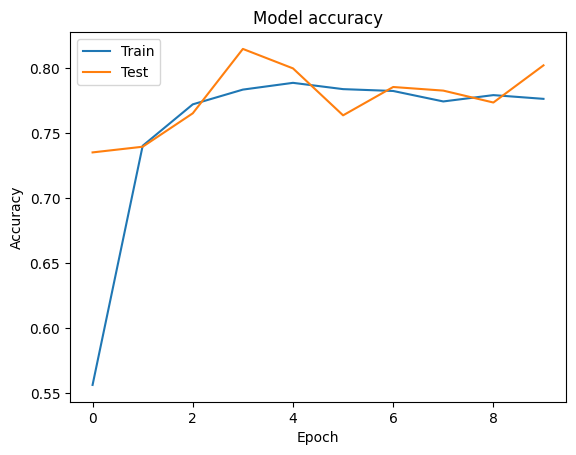

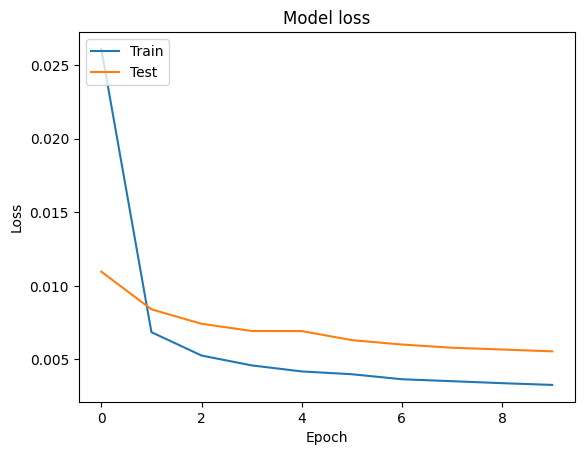

In [21]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
